In [102]:
import tweepy
import spacy
import re
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')

## tweets data

In [ ]:
nlp = spacy.load('en_core_web_md')
s_stemmer = SnowballStemmer(language='english')

In [10]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 6.7 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 491 kB 89.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 768 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 22.4 MB/s eta 0:00:01
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [5]:
consumer_key = "aGgWXgGEVuTtXODmmTn5pN9BN"
consumer_secret = "7I2MgjyGcrgyXVziqFtlm3777HMH5IQA6A8A5XwMjrqdyVFOS2"
access_token = "1578553498161004544-U04dW5oNZB73iETRcaAazL8nf3Kh9n"
access_token_secret = "TW3uuJArfGnE6f02upRUBf7LeFWvGXdDC26Q2zf8bKafH"

In [86]:
client = tweepy.Client(consumer_key=consumer_key, \
                       consumer_secret=consumer_secret, \
                       access_token=access_token,access_token_secret= access_token_secret)
tweets = client.get_users_tweets(id=44196397, max_results=100, user_auth=True)
texts = []
for tweet in tweets.data:
    texts.append(tweet.text)
texts

['@teslaownersSV We’ll widen V11 beta before Thanksgiving',
 '@dcherring @nichegamer Hard to say who’s celeb &amp; who isn’t. Being able to sort by follower count &amp; disallowing deliberate impersonation probably solves this.',
 '@nichegamer All unpaid legacy Blue checkmarks will be removed in a few months',
 '@RationalBlonde With new release, changing your verified name will cause loss of checkmark until name is confirmed by Twitter to meet Terms of Service',
 '@RationalBlonde 🤣',
 '@TweetsOfJee @RationalBlonde 🤣',
 'Punting relaunch of Blue Verified to November 29th to make sure that it is rock solid',
 '@business False',
 '@mrjasonchoi @nytimes Interesting thread',
 '@SenBillNelson @NASA @SpaceX Much appreciated, SpaceX will not let NASA down!',
 'Important to admit when I’m wrong &amp; firing them was truly one of my biggest mistakes',
 'Welcoming back Ligma &amp; Johnson! https://t.co/LEhXV95Njj',
 '@BillyM2k Actual Silicon Valley is way crazier!',
 '@waitbutwhy This is just as 

In [203]:
total = []
for line in texts:
    line = line.strip().lower().split(" ")
    new_line = list(filter(lambda word : re.match('^[a-zA-Z]+$', word) != None and \
                           word not in nlp.Defaults.stop_words, line))
    new_line = list(map(lambda word : s_stemmer.stem(word), new_line))
    total = total + new_line
total = total + total
print(len(total[:500]))
text_topredict = " ".join(total[:500])
text_topredict

500


'widen beta thanksgiv hard celeb abl sort follow count disallow deliber imperson probabl solv unpaid legaci blue checkmark remov month new chang verifi caus loss checkmark confirm twitter meet term servic punt relaunch blue verifi novemb sure rock solid fals interest thread spacex let nasa import admit wrong fire truli biggest mistak welcom ligma actual silicon valley way result peopl live popul collaps dramat decreas birth fals appreci schrep great tragic case adult onset compel case injustic serious ligma johnson welcom anytim like apolog fire immens talent doubt great use obama give medal exact server control team know stop work time server solv weak internet connect older note twitter india countri slow latest starlink rebuild internet mayb know slight guy wrote code websit server critic twitter work accord server control reduc data serial trip simplifi app need improv speed twitter slow indonesia sec refresh homelin tweet work especi android question delay word appreci malenia bat

## load csv

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
import pickle
import os.path
import plotly.offline as pyo
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [104]:
MBTI = pd.read_csv('MBTI 500.csv')
MBTI.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [105]:
MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [109]:
df_bar_chart = MBTI.groupby('type').count()
trace1 = go.Bar(x=df_bar_chart.index, y=df_bar_chart['posts'])
data = [trace1]
layout = go.Layout(title='MBTI # Classified Posts per Type')
fig = go.Figure(data=data, layout=layout)
fig.show()

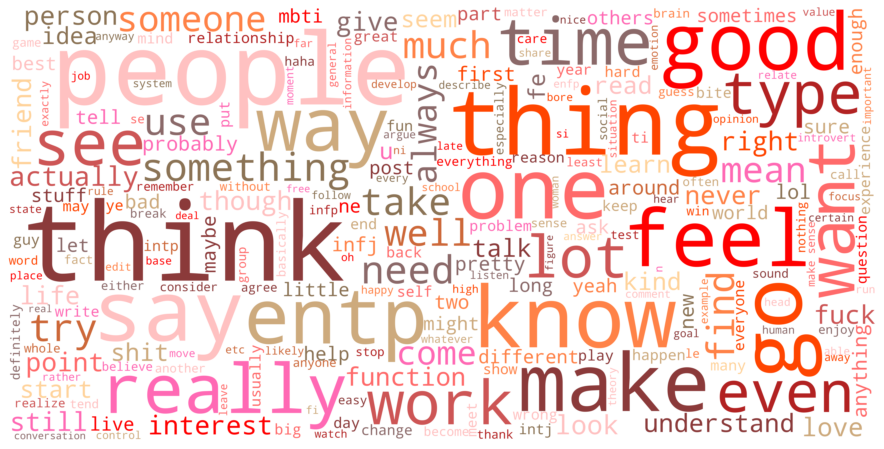

In [181]:
text = ""
cnt = 0
for row in MBTI.iterrows():
    if row[1][1] == "ENTP":
        text = text + row[1][0]
        cnt = cnt + 1
    if cnt == 100:
        break

color_list=['#FF0000', '#FFC1C1', '#8B6969', '#FF6A6A', '#CD5555', '#8B3A3A', '#FF8247', '#CD6839', '#FFD39B', 
            '#CDAA7D', '#8B7355', '#B22222', '#FF4500', '#FF69B4']
colormap=colors.ListedColormap(color_list)

background = Image.open("tree.png")
graph = np.array(background)
wordcloud = WordCloud(width=2000,height=1000,
                      min_font_size=20,
                      max_font_size=250,
                      max_words=2000,
                      background_color="white", 
                      colormap=colormap, 
                      scale=4).generate(text)
plt.subplots(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('ENTP.jpg')
plt.show()

In [185]:
X = MBTI['posts'] # features
y = MBTI['type']  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
# Flag to re-create or not the machine learning model
recreate_model=False

# We'll save the model into a file:
filename = 'mbti_svm_v2.sav'

# If the model file doesn't exists
if not os.path.isfile(filename):
    recreate_model=True

In [188]:
# Check if need to recreate the model
if recreate_model:    
    
    # Creating an instance to vectorizer:
    vectorizer = TfidfVectorizer(analyzer='word', max_features=3000, lowercase=False)
    
    # Training the vectorizer:
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Training the classifier:
    clf = LinearSVC()
    clf.fit(X_train_tfidf, y_train)
    
    # Pipelining the vectorizer and the classifier
    text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
    text_clf.fit(X_train, y_train)
    
    # saving the model to disk
    pickle.dump(text_clf, open(filename, 'wb'))

# If there is no need to recreate the model, just open the file from the disk    
else:
    # loading the model from disk
    text_clf = pickle.load(open(filename, 'rb'))

In [189]:
predictions = text_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.84      0.58      0.69       319
        ENFP       0.82      0.78      0.80      1249
        ENTJ       0.90      0.80      0.84       577
        ENTP       0.86      0.83      0.84      2324
        ESFJ       0.83      0.45      0.59        33
        ESFP       0.88      0.48      0.62        75
        ESTJ       0.90      0.84      0.87       105
        ESTP       0.95      0.90      0.92       398
        INFJ       0.81      0.84      0.83      2954
        INFP       0.80      0.82      0.81      2391
        INTJ       0.83      0.87      0.85      4531
        INTP       0.84      0.87      0.86      5033
        ISFJ       0.80      0.61      0.69       132
        ISFP       0.81      0.60      0.69       161
        ISTJ       0.86      0.68      0.76       253
        ISTP       0.89      0.79      0.84       679

    accuracy                           0.84     21214
   macro avg       0.85   

In [190]:
print(f"Overall accuracy of the model: {round(metrics.accuracy_score(y_test, predictions),2)}")

Overall accuracy of the model: 0.84


In [208]:
vec_tfidf = TfidfVectorizer(analyzer='word', max_features=3000, lowercase=False)
vec_tfidf.fit(X_train)

TfidfVectorizer(lowercase=False, max_features=3000)

In [210]:
logitmodel=LogisticRegression()
logitmodel.fit(vec_tfidf.transform(X_train), y_train)
logitmodel.score(vec_tfidf.transform(X_test), y_test)

0.8158763080984256

In [211]:
logitmodel.predict(vec_tfidf.transform([text_topredict]))

array(['INTP'], dtype=object)

In [212]:
svmmodel = LinearSVC()
svmmodel.fit(vec_tfidf.transform(X_train), y_train)
svmmodel.score(vec_tfidf.transform(X_test), y_test)

0.8151220891863864

In [213]:
svmmodel.predict(vec_tfidf.transform([text_topredict]))

array(['INTP'], dtype=object)